To do:
- create per division mean value of:
    - rounds **DONE** 
    - age **DONE**
    - bouts **DONE**
    - wins **DONE**
    - losses **DONE**
    - draws **DONE**
    - height **DONE**
    - reach 
        - reach relative to height
    - time since debut >> == (current date - debut)

- for values missing in:
    - age: **DONE**
        - no data = average age of division 
    - reach:
        - reach == (height + reach relative to height for division)
    - height: **DONE**
        - average weight of division and replace missing values with this...
    - stance:
        unclear...

age - missing = 19/793 - pct missing = 2.4%
stance - missing = 82/793 - pct missing = 10.34%    
height - missing = 98/793 - pct missing = 12.36%    
reach - missing = 380/793 - pct missing = 47.92%    
birth place - missing = 79/793 - pct missing = 9.96%

In [76]:
import pandas as pd
import numpy as np

boxrec_data = pd.read_csv('boxrec_tables.csv')
df = pd.DataFrame(boxrec_data)


In [77]:
df.replace(to_replace='None', value=np.nan, regex=True, inplace=True)

In [78]:
df.insert(3, 'div index', '')


In [79]:
div_list = ['heavy', 'cruiser', 'lightheavy', 'supermiddle', 'middle', 'superwelter', 'welter', 'superlight', 'light', 'feather', 'superbantam', 'bantam', 'superfly', 'fly', 'lightfly', 'minimum']

x = 0
for value in df['division']:
    df.at[x, 'div index'] = div_list.index(value)
    x += 1

In [80]:
ds = df.sort_values(by=['div index', 'division rating'], ascending=True)
rounds = df.sort_values(by=['rounds'], ascending = False)

In [81]:
# ds.dtypes 
# Can see age/height/reach need to be turned to float64s
cols_to_convert = ['age', 'height', 'reach']

for col in cols_to_convert:
    ds[col] = ds[col].astype(float)


In [82]:
average_by_division = ds.groupby(['division']).mean(numeric_only=True)

average_everything_numeric = ds.mean(numeric_only=True)

In [83]:
def replace_nan_with_mean(column, grouping_column):
    ds[column] = ds.groupby(grouping_column)[column].transform(lambda x: x.fillna(round(x.mean(), 2)))

In [84]:
replace_nan_with_mean('age', 'division')
replace_nan_with_mean('height', 'division')

In [97]:
diff_reach = ds.reach - ds.height
ds.insert(12, 'diff reach', diff_reach)

replace_nan_with_mean('diff reach', 'division')

In [ ]:
ds.reach = ds.height + ds['diff reach']

ds

<AxesSubplot: xlabel='rounds', ylabel='bouts'>

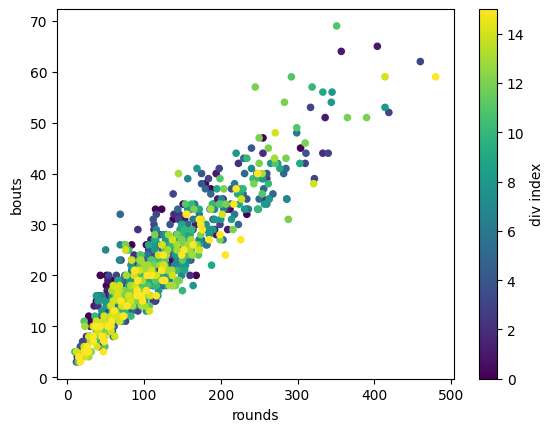

In [116]:
ds.plot.scatter(x='rounds', y='bouts', c='div index', colormap='viridis')